# Air Quality Prediction

An air quality index (AQI) is used by government agencies to communicate to the public how polluted the air currently is or how polluted it is forecast to become. Public health risks increase as the AQI rises. Different countries have their own air quality indices, corresponding to different national air quality standards.

For Air quality prediction we will use 4 algorithms:

1.Linear Regression

2.Lasso Regression

3.Ridge Regression

4.Decision Tree Regressor

5.Random Forest Regressor

6.K-Nearest Neighbors

By using the above algorithms, we will train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns by error check and accuracy check.

We have implemented the following steps -

Step 1: Data Visualization

Step 2: Data Exploration

Step 3: Data Cleaning

Step 3:Data Training

Step 4: Model Creation

Step 5: Performance Evaluation

## **Data Visualization**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML 

In [3]:
data=pd.read_csv(r"C:\Users\91781\Downloads\ml\city_day.csv")
data

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [4]:
def missing_values_table(df):
    
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0: 'Missing Values', 1: '% of Total Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    print(f"Your selected dataframe has {df.shape[1]} columns.\n"
          f"There are {mis_val_table_ren_columns.shape[0]} columns that have missing values.")

    return mis_val_table_ren_columns

missing_values = missing_values_table(data)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


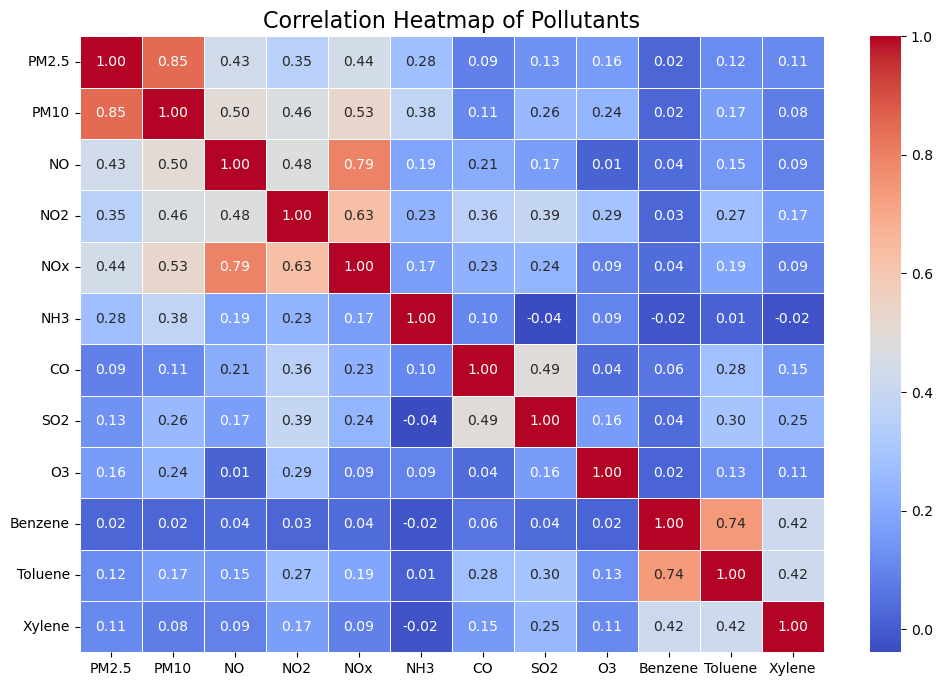

In [11]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

pollutants_data = data[pollutants]

corr_matrix = pollutants_data.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Pollutants', fontsize=16)

plt.show()

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


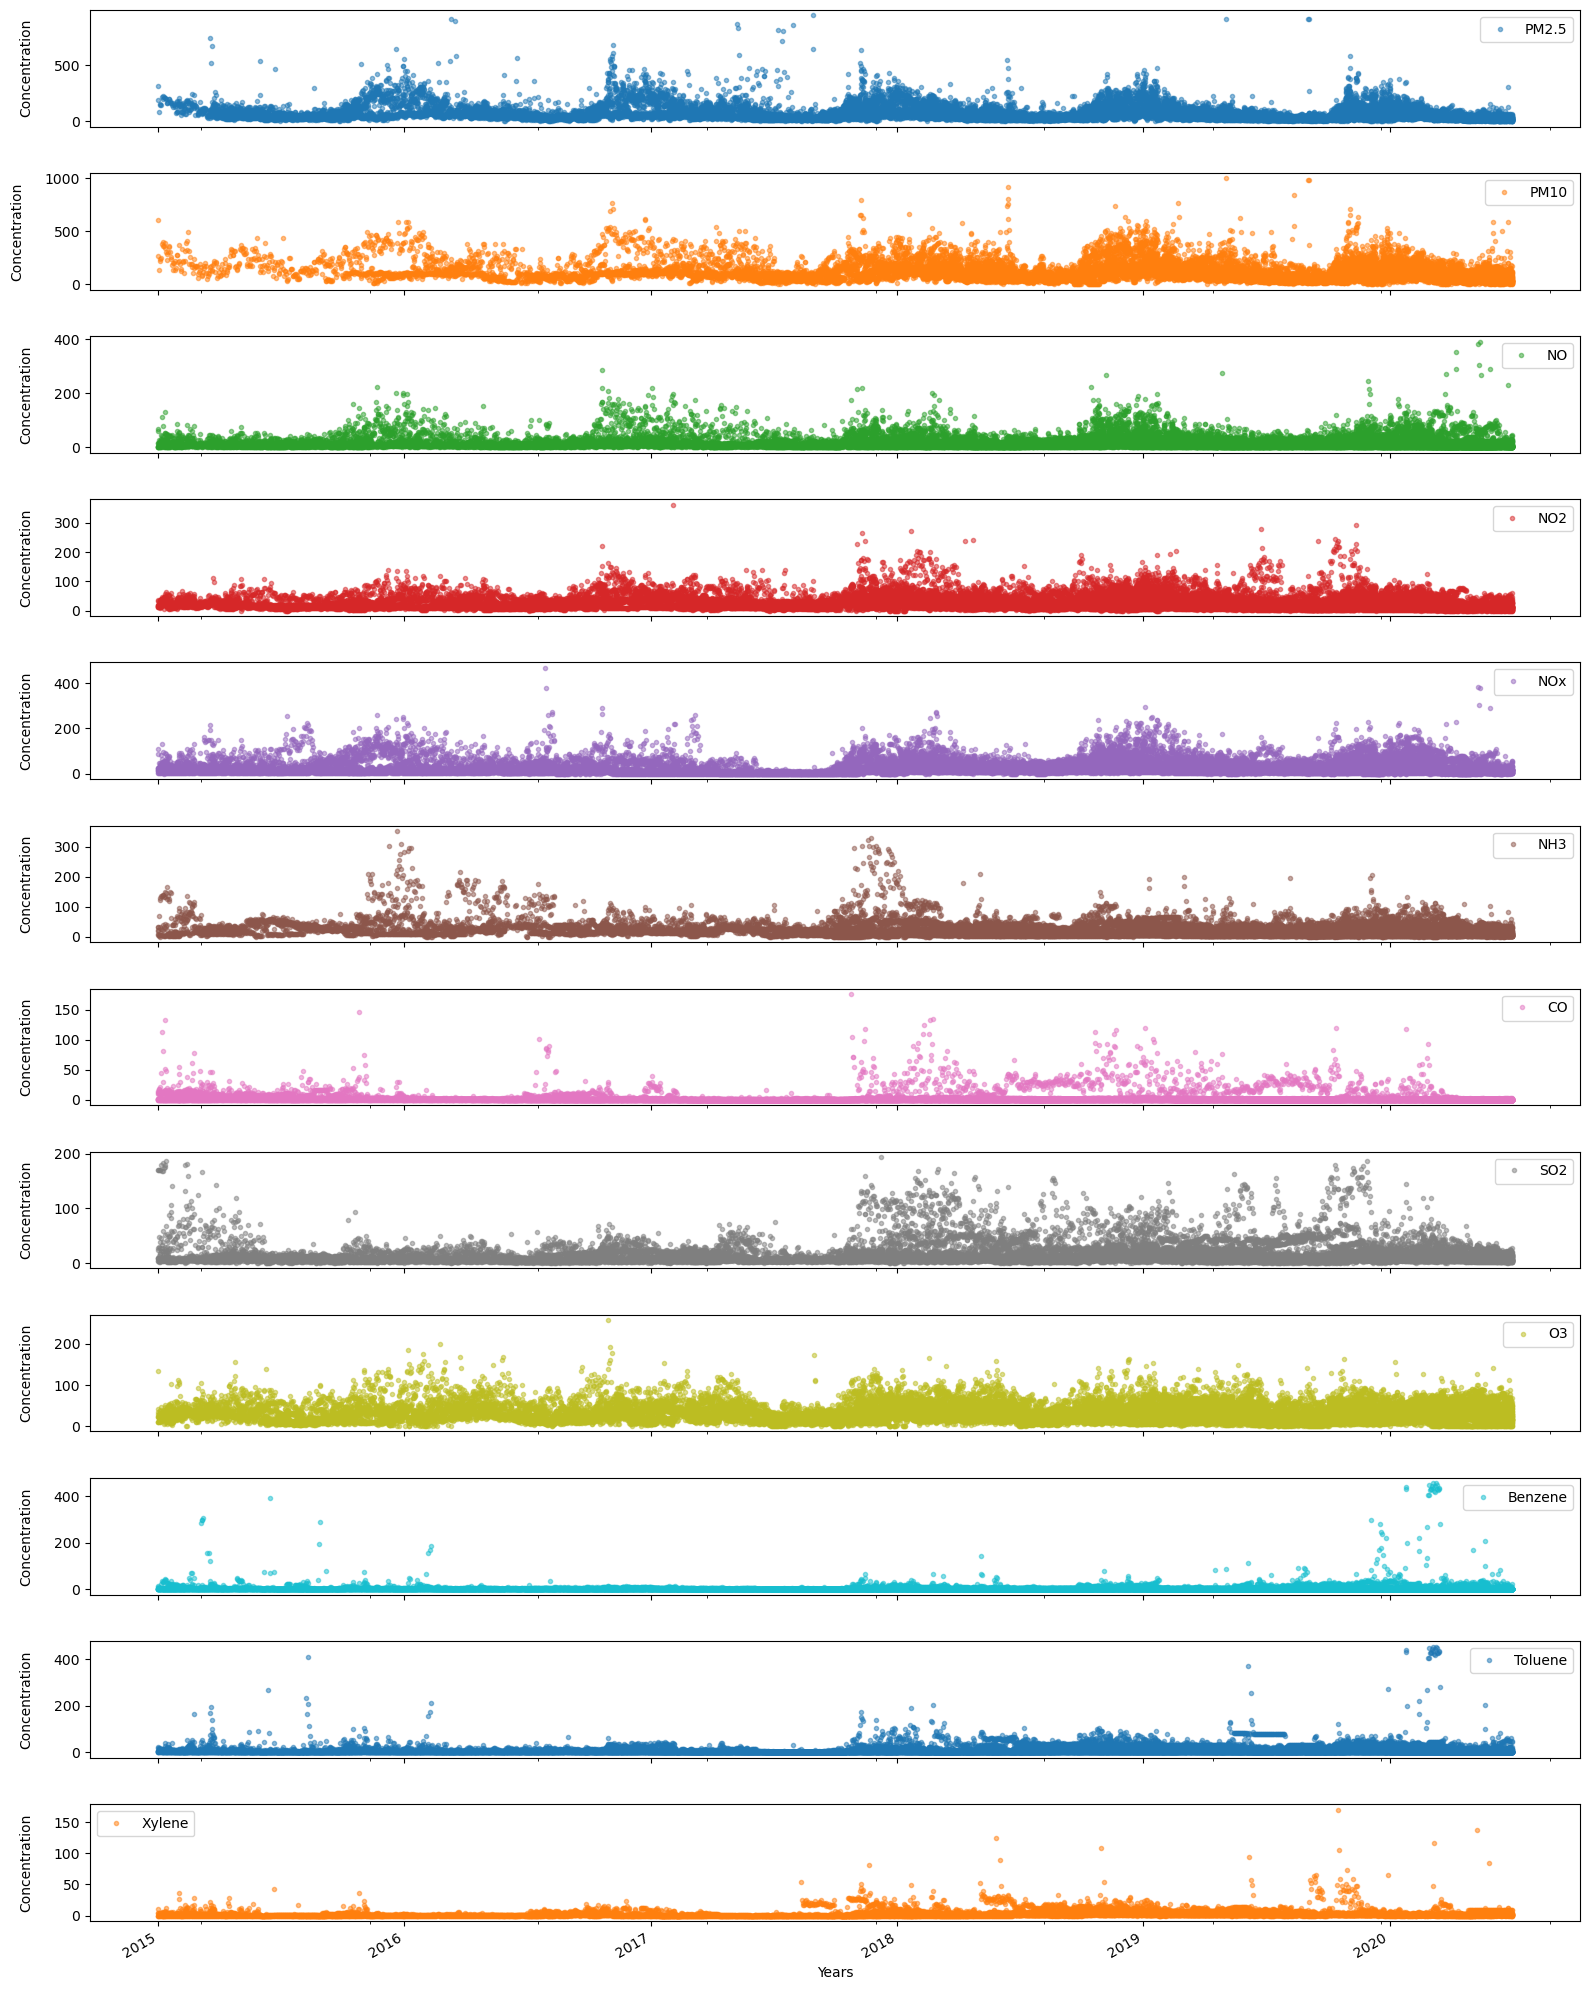

In [13]:
print(data.columns)

axes = data[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)

for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('Concentration', labelpad=15)

plt.tight_layout()

plt.subplots_adjust(hspace=0.4)  # Increase the space between subplots

plt.show()

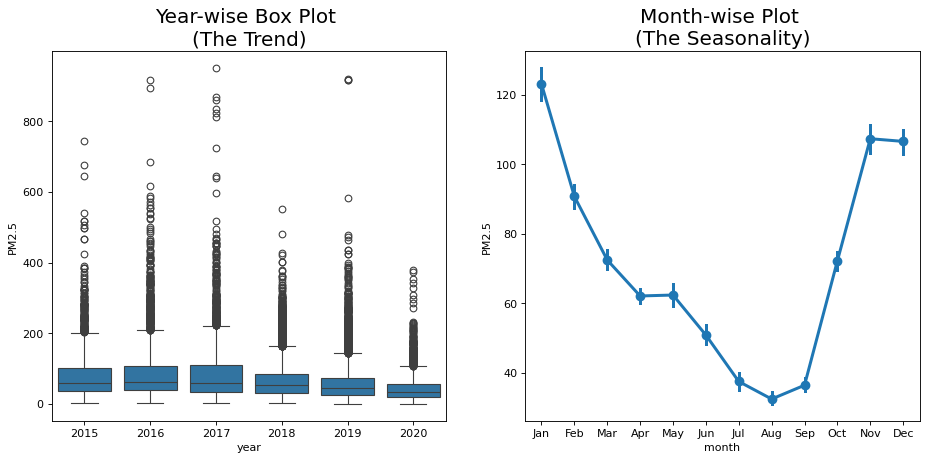

In [9]:
def trend_plot(dataframe,value):

    dataframe = dataframe.reset_index()  

    dataframe['year'] = [d.year for d in dataframe['Date']]  # Access 'Date' column after reset_index
    dataframe['month'] = [d.strftime('%b') for d in dataframe['Date']] # Access 'Date' column after reset_index
    years = dataframe['year'].unique()

    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=dataframe, ax=axes[0])
    sns.pointplot(x='month', y=value, data=dataframe.loc[~dataframe.year.isin([2015, 2020]), :])

    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

value = 'PM2.5'

trend_plot(data, value)



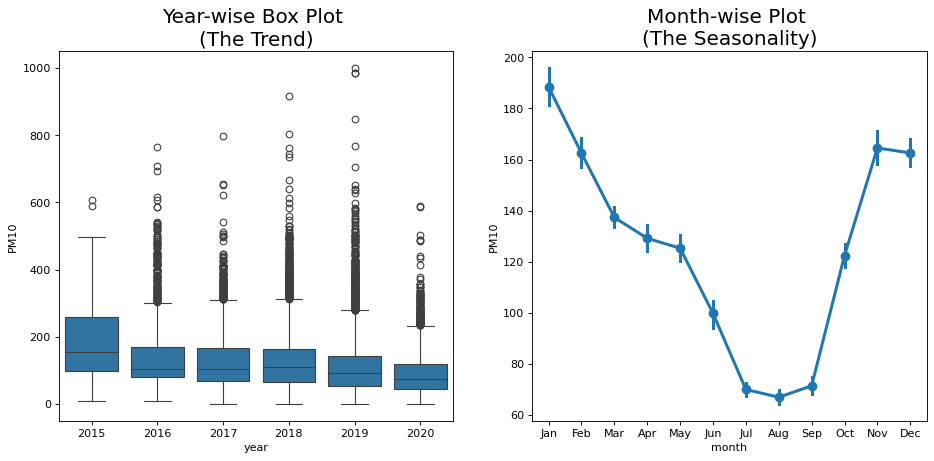

In [879]:
df = data.copy()
value = 'PM10'
trend_plot(df, value)


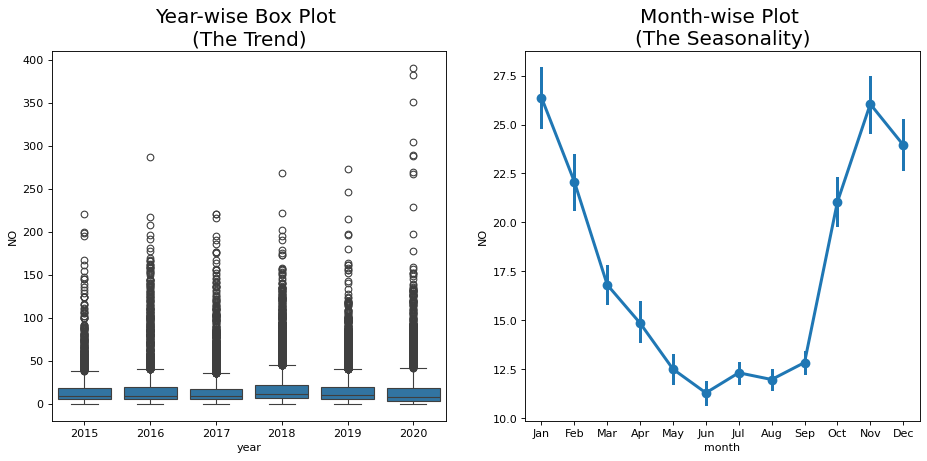

In [880]:
df = data.copy()
value = 'NO'
trend_plot(df, value)

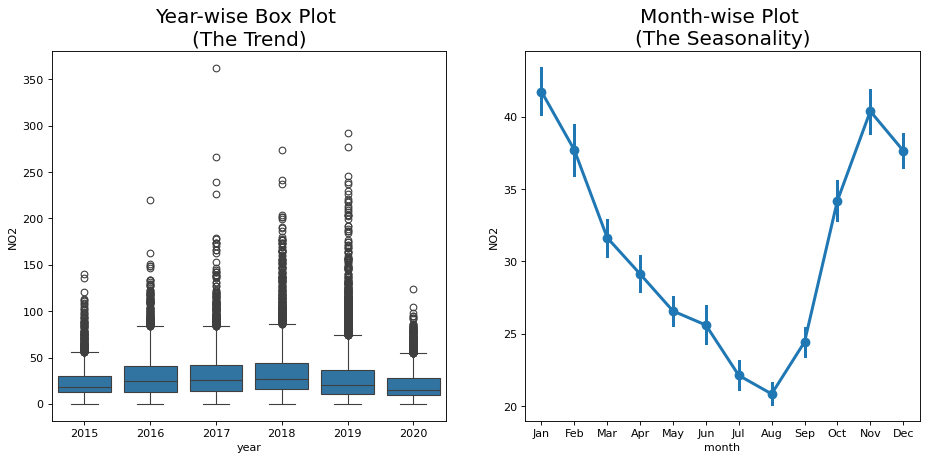

In [881]:
df = data.copy()
value = 'NO2'
trend_plot(df, value)

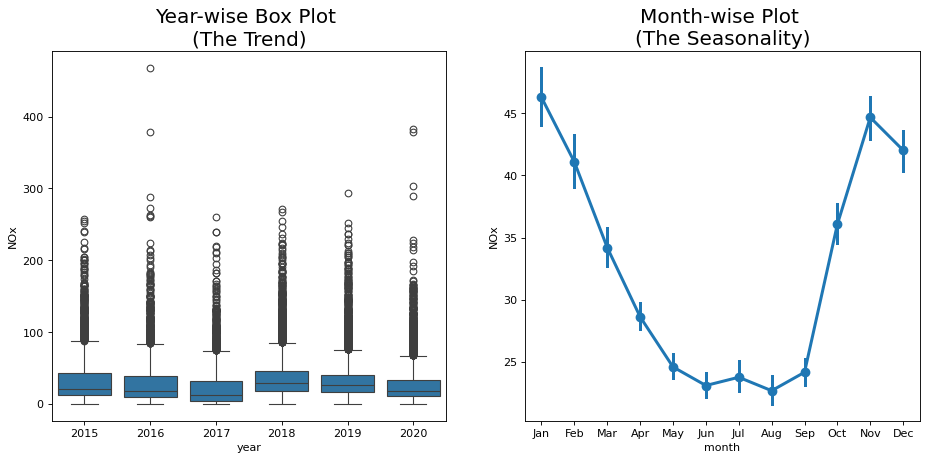

In [882]:
df = data.copy()
value = 'NOx'
trend_plot(df, value)

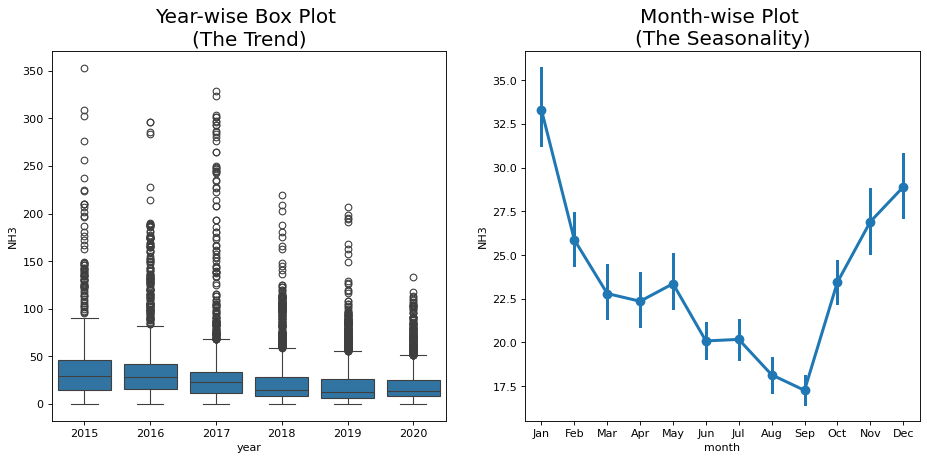

In [883]:
df = data.copy()
value = 'NH3'
trend_plot(df, value)

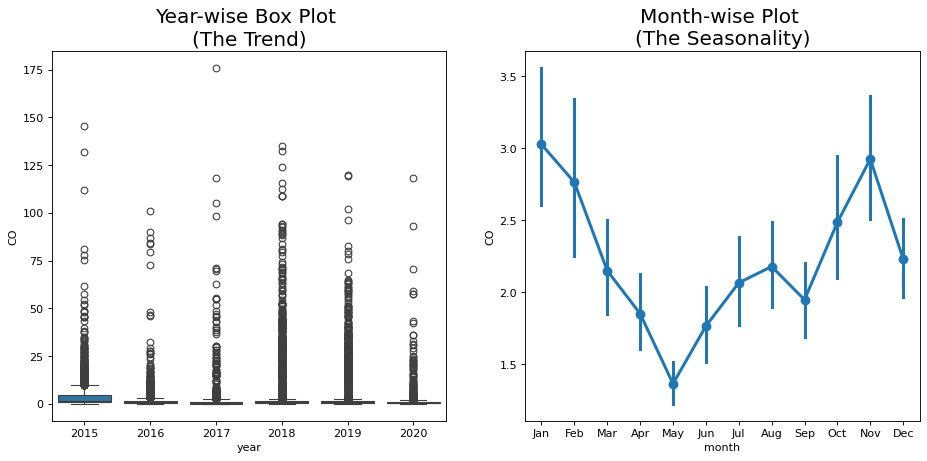

In [884]:
df = data.copy()
value = 'CO'
trend_plot(df, value)

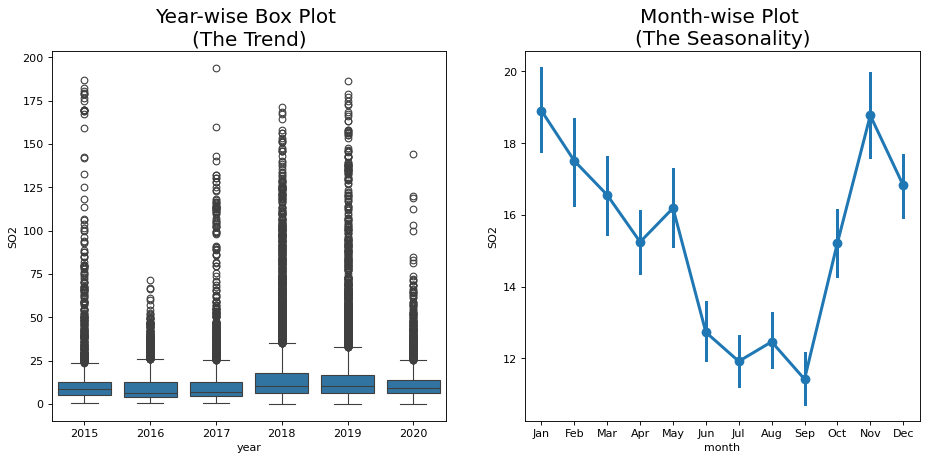

In [885]:
df = data.copy()
value = 'SO2'
trend_plot(df, value)

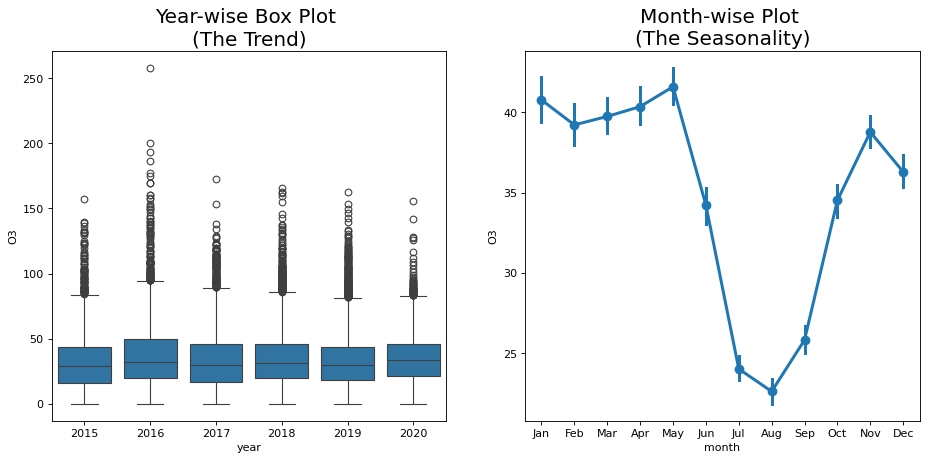

In [886]:
df = data.copy()
value = 'O3'
trend_plot(df, value)

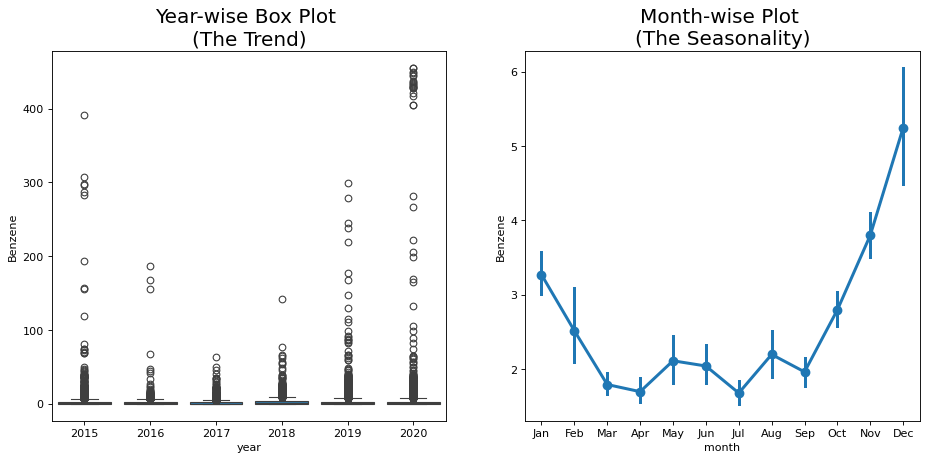

In [887]:
df = data.copy()
value = 'Benzene'
trend_plot(df, value)

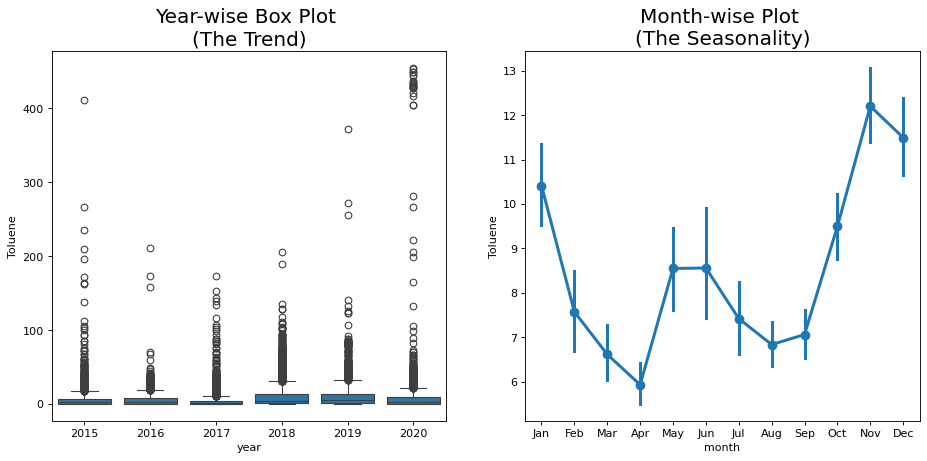

In [888]:
df = data.copy()
value = 'Toluene'
trend_plot(df, value)

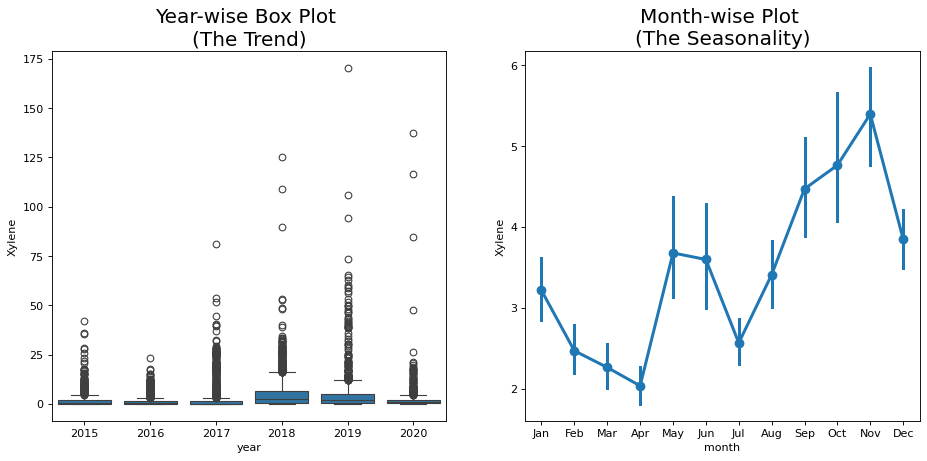

In [889]:
df = data.copy()
value = 'Xylene'
trend_plot(df, value)

In [17]:
def max_polluted_city(pollutant):
    x1 = data[[pollutant, 'City']].groupby("City").mean().sort_values(by=pollutant, ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant], 2)
    return x1[:10].style.background_gradient(cmap='OrRd')

def display_side_by_side(*args):
    html_str = ''
    for i in range(0, len(args), 4):
        row_tables = args[i:i+4]
        row_html = ''.join(df.to_html() for df in row_tables)
        html_str += f'<div style="display: flex; justify-content: space-around; margin-bottom: 20px;">{row_html}</div>'
    display(HTML(html_str))
    
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

pollutant_tables = [max_polluted_city(pollutant) for pollutant in pollutants]
display_side_by_side(*pollutant_tables)

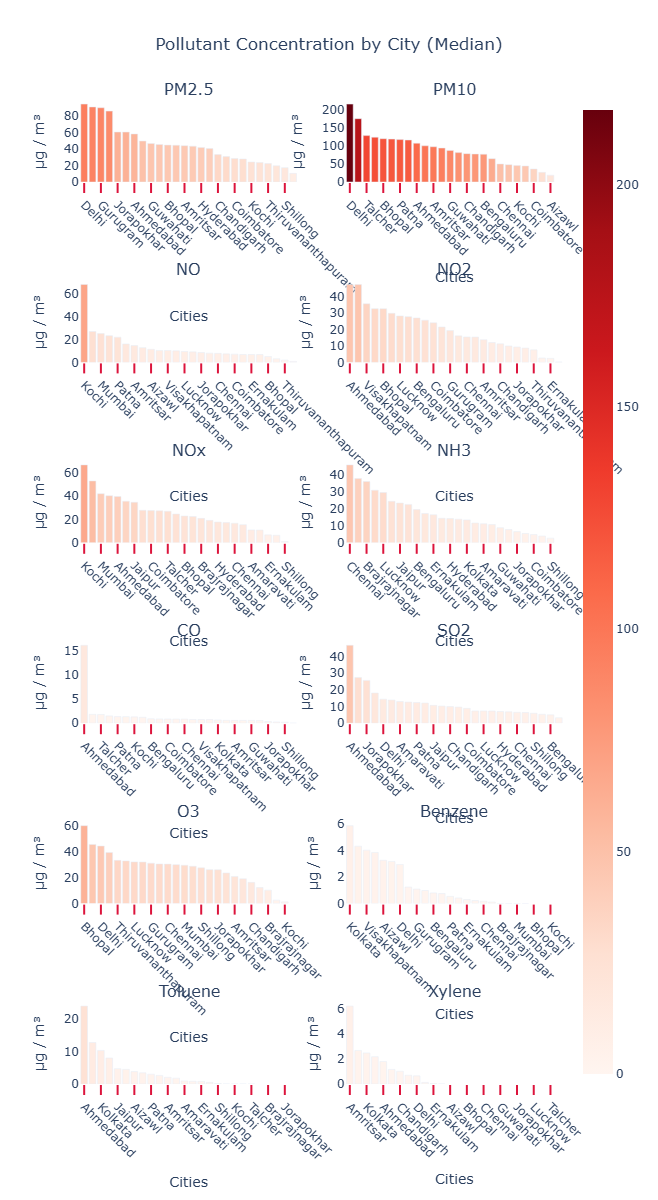

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

fig = make_subplots(
    rows=6, cols=2,
    subplot_titles=pollutants,
    vertical_spacing=0.1,
    horizontal_spacing=0.1
)

for i, pollutant in enumerate(pollutants):
    x = data[[pollutant, 'City']].groupby("City").median().sort_values(by=pollutant, ascending=False).reset_index()

    row = i // 2 + 1
    col = i % 2 + 1 

    fig.add_trace(go.Bar(
        y=x[pollutant], 
        x=x['City'],  
        marker=dict(color=x[pollutant], coloraxis="coloraxis"),
        name=pollutant
    ), row=row, col=col)

fig.update_layout(
    coloraxis=dict(colorscale='reds'),
    showlegend=False,
    plot_bgcolor='white',
    title_text="Pollutant Concentration by City (Median)",
    title_x=0.5,
    height=1200,
)

fig.update_xaxes(
    ticks="outside", 
    tickwidth=2,
    tickangle=45, 
    tickcolor='crimson', 
    ticklen=10, 
    title_text="Cities"
)

for i in range(1, 7):
    for j in range(1, 3):
        fig.update_yaxes(
            title_text="µg / m³", 
            row=i, col=j
        )

fig.show()


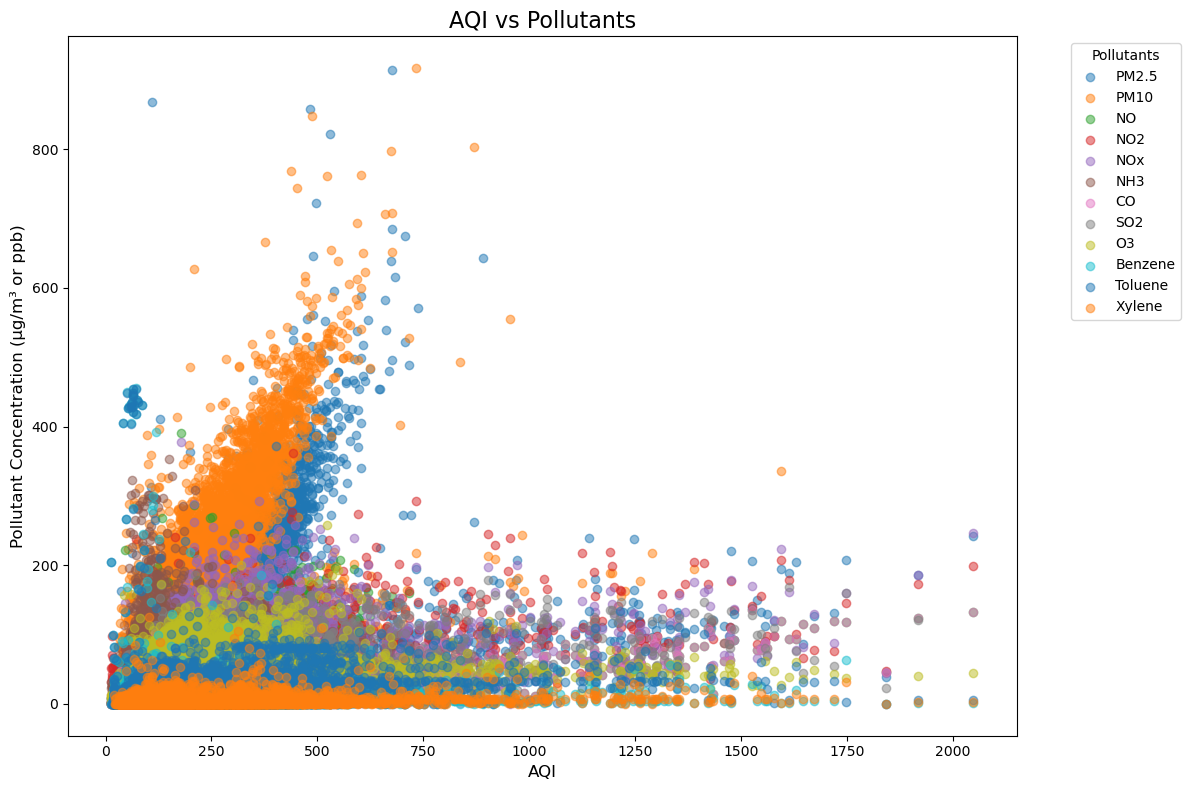

In [15]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

plt.figure(figsize=(12, 8))

for pollutant in pollutants:
    plt.scatter(data['AQI'], data[pollutant], alpha=0.5, label=pollutant)

plt.title('AQI vs Pollutants', fontsize=16)
plt.xlabel('AQI', fontsize=12)
plt.ylabel('Pollutant Concentration (µg/m³ or ppb)', fontsize=12)

plt.legend(title='Pollutants', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## **Data Exploration**

In [17]:
data.shape

(29531, 15)

In [19]:
data.dtypes

City           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [21]:
data.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [23]:
data.isnull().sum()

City              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

## **Data Cleaning**

**As we can see above there are Null or Missing Valyes in the data.We cannot use this type of data with null values as it affects the performance as well as accuracy of the model.Therefore, we will clean the data.**

**For data cleaning, we'll fill the null values by their column's respective Mean.**

In [27]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2','CO', 'SO2', 'O3']

# Loop through each pollutant
for pollutant in pollutants:
    # Check for missing values
    missing_values = data[pollutant].isnull().sum()
    print(f"Missing values in {pollutant}: {missing_values}")
    
    # Calculate mean of the pollutant
    mean_value = data[pollutant].mean()
    print(f"Mean value of {pollutant}: {mean_value}")
    
    # Fill missing values with the mean (or any other value like 67)
    data[pollutant] = data[pollutant].fillna(mean_value)
    
    # Verify if missing values are filled
    missing_values_after = data[pollutant].isnull().sum()
    print(f"Missing values in {pollutant} after filling: {missing_values_after}\n")


Missing values in PM2.5: 0
Mean value of PM2.5: 67.45057794890306
Missing values in PM2.5 after filling: 0

Missing values in PM10: 0
Mean value of PM10: 118.12710293078136
Missing values in PM10 after filling: 0

Missing values in NO: 0
Mean value of NO: 17.574729662029366
Missing values in NO after filling: 0

Missing values in NO2: 0
Mean value of NO2: 28.560659061126955
Missing values in NO2 after filling: 0

Missing values in CO: 0
Mean value of CO: 2.248598209085615
Missing values in CO after filling: 0

Missing values in SO2: 0
Mean value of SO2: 14.53197725590996
Missing values in SO2 after filling: 0

Missing values in O3: 0
Mean value of O3: 34.49143047551844
Missing values in O3 after filling: 0



In [29]:
data.isnull().sum()

City              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx            4185
NH3           10328
CO                0
SO2               0
O3                0
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [52]:
aqi_mean = data['AQI'].mean()
data['AQI'] = data['AQI'].fillna(aqi_mean)
print(data['AQI'].isnull().sum())

0


In [54]:
newdata=data.drop(['City','NOx', 'NH3','Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1)
newdata.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [56]:
newdata.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

There are no null values present in the data.We can proceed with next steps.

In [59]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   29531 non-null  float64
 1   PM10    29531 non-null  float64
 2   NO      29531 non-null  float64
 3   NO2     29531 non-null  float64
 4   CO      29531 non-null  float64
 5   SO2     29531 non-null  float64
 6   O3      29531 non-null  float64
 7   AQI     29531 non-null  float64
dtypes: float64(8)
memory usage: 2.0 MB


In [61]:
prepareddata=newdata.astype(int)
prepareddata.head()

PM2.5  PM10  NO  NO2  CO  SO2   O3  AQI
Date                                               
2015-01-01     67   118   0   18   0   27  133  166
2015-01-02     67   118   0   15   0   24   34  166
2015-01-03     67   118  17   19  17   29   30  166
2015-01-04     67   118   1   18   1   18   36  166
2015-01-05     67   118  22   21  22   39   39  166

In [938]:
prepareddata.tail()

PM2.5  PM10  NO  NO2  CO  SO2  O3  AQI
Date                                              
2020-06-27     15    50   7   25   0    8  23   41
2020-06-28     24    74   3   26   0   12  30   70
2020-06-29     22    65   3   29   0    8  30   68
2020-06-30     16    49   4   29   0    9  28   54
2020-07-01     15    66   0   26   0    2  17   50

In [939]:
prepareddata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   29531 non-null  int32
 1   PM10    29531 non-null  int32
 2   NO      29531 non-null  int32
 3   NO2     29531 non-null  int32
 4   CO      29531 non-null  int32
 5   SO2     29531 non-null  int32
 6   O3      29531 non-null  int32
 7   AQI     29531 non-null  int32
dtypes: int32(8)
memory usage: 1.1 MB


The above is the prepared data that we will use for visualization and model creation

In [941]:
prepareddata.describe()

PM2.5          PM10            NO           NO2            CO  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      66.961667    117.771460     17.061698     28.059226      1.805052   
std       59.415477     71.502782     21.365891     22.944183      6.710749   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       32.000000     79.000000      6.000000     12.000000      0.000000   
50%       58.000000    118.000000     11.000000     25.000000      0.000000   
75%       72.000000    118.000000     17.000000     34.000000      1.000000   
max      949.000000   1000.000000    390.000000    362.000000    175.000000   

                SO2            O3           AQI  
count  29531.000000  29531.000000  29531.000000  
mean      14.029765     33.995259    166.390099  
std       16.910682     20.161619    129.064459  
min        0.000000      0.000000     13.000000  
25%        6.000000     20.000000     88.000000  
50%       10.000000     34.000000    138.000000  
75%       14.000000     42.000000    179.000000  
max      193.000000    257.000000   2049.000000

<Axes: >

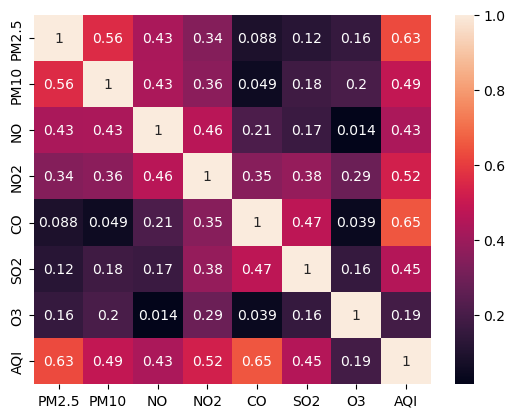

In [63]:
corr = prepareddata.corr() 
sns.heatmap(corr, annot=True)

Insights -

1.When the value of pollutents is less, Air Quality Index (AQI) is less.

2.AQI highly depends on - 

i.Ground-level ozone

ii.Particle pollution (also known as particulate matter, including PM2.5 and PM10)

iii.Carbon monoxide

iv.Sulfur dioxide

v.Nitrogen dioxide

## **Data Training**

In [65]:
from sklearn.model_selection import train_test_split
x=prepareddata[['PM2.5', 'PM10', 'NO', 'NO2','CO', 'SO2','O3']]  
y=prepareddata['AQI']

In [67]:
x.shape

(29531, 7)

In [69]:
y.shape

(29531,)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

## **Model Creation**

**Linear Regression**

In [75]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import numpy as np

reg1 = LinearRegression()
reg1.fit(x_train, y_train)

pred1 = reg1.predict(x_test)

print("R-squared (model fit) of the Linear Regression Model is: \n")
print(reg1.score(x_train, y_train))

rmse = np.sqrt(mean_squared_error(y_test, pred1))
print("\nRoot Mean Squared Error (RMSE) of the Model is :")
print(rmse)


R-squared (model fit) of the Linear Regression Model is: 

0.7942005534056688

Root Mean Squared Error (RMSE) of the Model is :
58.8280481036456


In [83]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

best_lasso = grid_search.best_estimator_

predictions = best_lasso.predict(x_test)

print("R-squared (model fit) of the Lasso Regression Model is:")
print(best_lasso.score(x_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("\nRoot Mean Squared Error (RMSE) of the Model is :")
print(rmse)


Best alpha value: 1
R-squared (model fit) of the Lasso Regression Model is:
0.7909268943093103

Root Mean Squared Error (RMSE) of the Model is :
58.81832363959392


In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge = Ridge()

grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(x_train, y_train)

best_alpha_ridge = grid_search_ridge.best_params_['alpha']
print(f"Best alpha value for Ridge: {best_alpha_ridge}")

best_ridge = grid_search_ridge.best_estimator_

pred3 = best_ridge.predict(x_test)

print("R-squared (model fit) of the Ridge Regression Model is: ")
print(best_ridge.score(x_test, y_test))
rmse_reg3 = np.sqrt(mean_squared_error(y_test, pred3))
print("\nRoot Mean Squared Error (RMSE) of the Model is :")
print(rmse_reg3)



Best alpha value for Ridge: 100
R-squared (model fit) of the Ridge Regression Model is: 
0.7908613614643378

Root Mean Squared Error (RMSE) of the Model is :
58.82754106158992


**Decision Tree Regressor**

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'random_state': [42]
}

dt = DecisionTreeRegressor()

grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(x_train, y_train)

best_params_dt = grid_search_dt.best_params_
print(f"Best parameters for Decision Tree: {best_params_dt}")

best_dt = grid_search_dt.best_estimator_

pred4 = best_dt.predict(x_test)

print("R-squared (model fit) of the Decision Tree Regression Model is: ")
print(best_dt.score(x_test, y_test))

rmse_reg4 = np.sqrt(mean_squared_error(y_test, pred4))
print("\nRoot Mean Squared Error (RMSE) of Decision Tree Model is:")
print(rmse_reg4)


Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 42}
R-squared (model fit) of the Decision Tree Regression Model is: 
0.8256856333157305

Root Mean Squared Error (RMSE) of Decision Tree Model is:
53.70690782443929


**Random Forest Regressor**

In [97]:
from sklearn.ensemble import RandomForestRegressor

reg5 = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters like n_estimators, max_depth, etc.
reg5.fit(x_train, y_train)

pred5 = reg5.predict(x_test)

print("R-squared (model fit) of the Random Forest Regression Model is: \n")
print(reg5.score(x_train, y_train))

rmse_reg5 = np.sqrt(mean_squared_error(y_test, pred5))
print("\nRoot Mean Squared Error (RMSE) of the Model is :")
print(rmse_reg5)

Accuracy of the Random Forest Regression Model is: 

0.9816434608081567

Root Mean Squared Error (RMSE) of the Model is :
49.6406751869832


**K-Nearest Neighbours Regression**

In [101]:
from sklearn.neighbors import KNeighborsRegressor

reg6 = KNeighborsRegressor(n_neighbors=5)
reg6.fit(x_train, y_train)

pred6 = reg6.predict(x_test)

print("R-squared (model fit) of the K-Nearest Neighbors Regression Model is: \n")
print(reg6.score(x_train, y_train))

rmse_reg6 = np.sqrt(mean_squared_error(y_test, pred6))
print("\nRoot Mean Squared Error (RMSE) of the Model is :")
print(rmse_reg6)

R-squared (model fit) of the K-Nearest Neighbors Regression Model is: 

0.8888086384239228

Root Mean Squared Error (RMSE) of the Model is :
52.90393400572916


## **Performance Evaluation**

In [121]:
print("Model\t\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(x_train, y_train)))
print("""Lasso Regression \t\t {:.4f} \t \t\t {:.4f}""".format(np.sqrt(mean_squared_error(y_test,predictions )), best_lasso.score(x_train, y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(np.sqrt(mean_squared_error(y_test, pred3)), best_ridge.score(x_train, y_train)))
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(np.sqrt(mean_squared_error(y_test, pred4)), best_dt.score(x_test, y_test)))
print("""Random Forest Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(np.sqrt(mean_squared_error(y_test, pred5)), reg5.score(x_train, y_train)))
print("""K-Nearest Neighbors \t\t {:.4f} \t \t\t {:.4f}""".format(np.sqrt(mean_squared_error(y_test, pred6)), reg6.score(x_train, y_train)))

Model				 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 58.8280 	 		 0.7942
Lasso Regression 		 58.8183 	 		 0.7942
Ridge Regression 		 58.8275 	 		 0.7942
Decision Tree Regressor		 53.7069 	 		 0.8257
Random Forest Regressor		 49.6407 	 		 0.9816
K-Nearest Neighbors 		 52.9039 	 		 0.8888


The performance of the regression models—Linear Regression, Lasso Regression, Ridge Regression, Decision Tree Regressor, Random Forest Regressor, and K-Nearest Neighbors—was compared based on accuracy and RMSE.

Linear, Lasso, and Ridge Regression showed similar accuracy, with regularization not significantly improving performance.
Decision Tree Regressor achieved higher accuracy and the lowest RMSE, making it the most efficient model for this dataset due to its ability to capture non-linear relationships.

In conclusion, Random Forest outperformed the other models and is the most effective choice for this task.